In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calories=pd.read_csv('calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
exercise=pd.read_csv('exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94,29,105.0,40.8
1,14861698,female,20,166.0,60,14,94.0,40.3
2,11179863,male,69,NaN,79,5,88.0,38.7
3,16180408,female,34,179.0,71,13,100.0,40.5
4,17771927,female,27,154.0,58,10,81.0,39.8


# Data Cleaning

In [4]:
calories=calories.drop(['User_ID'],axis=1)

In [5]:
calories.head()

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


In [6]:
exercise.isnull().sum()    #Height Column contains 4 NULL values and Heart_Rate Column contains 1 NULL value
                            #which is to be replaced by Mean Value of Height and Age Column

User_ID       0
Gender        0
Age           0
Height        4
Weight        0
Duration      0
Heart_Rate    1
Body_Temp     0
dtype: int64

In [7]:
mean_value=exercise['Height'].mean()
mean_value

174.46585756201654

In [8]:
mean_value_Heart_rate=exercise['Heart_Rate'].mean()
mean_value_Heart_rate

95.51730115341023

In [9]:
exercise['Height'].fillna(value=mean_value,inplace=True)
exercise['Heart_Rate'].fillna(value=mean_value_Heart_rate,inplace=True)

In [10]:
exercise.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [11]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.000000,94,29,105.0,40.8
1,14861698,female,20,166.000000,60,14,94.0,40.3
2,11179863,male,69,174.465858,79,5,88.0,38.7
3,16180408,female,34,179.000000,71,13,100.0,40.5
4,17771927,female,27,154.000000,58,10,81.0,39.8


In [12]:
calories_data=pd.concat([exercise,calories],axis=1) #Final Dataframe calories_data 

In [13]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.000000,94,29,105.0,40.8,231.0
1,14861698,female,20,166.000000,60,14,94.0,40.3,66.0
2,11179863,male,69,174.465858,79,5,88.0,38.7,26.0
3,16180408,female,34,179.000000,71,13,100.0,40.5,71.0
4,17771927,female,27,154.000000,58,10,81.0,39.8,35.0


In [14]:
#calories_data.shape
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 1.0+ MB


# Data Visualization

Shows the Count of Male and Female

C:\Users\Satvik\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

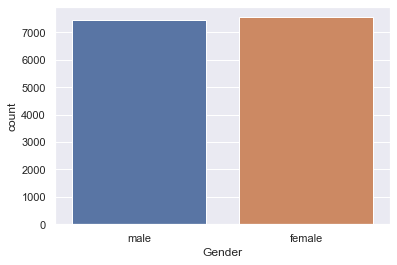

In [15]:
sns.set()
sns.countplot(calories_data['Gender']) 


Shows the Distribution of Age, Height and Weight

Text(0, 0.5, 'Number of People')

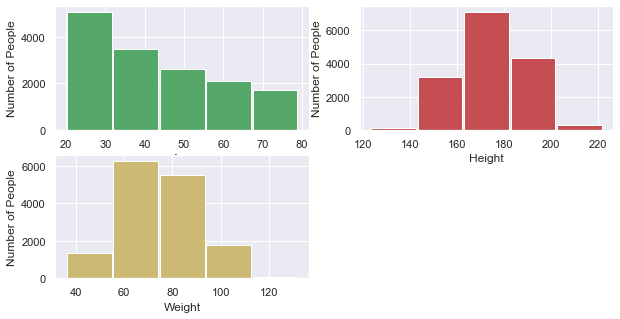

In [16]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.hist(calories_data['Age'],rwidth=0.965,bins=5,color='g') 
plt.xlabel('Age')
plt.ylabel('Number of People')

plt.subplot(2,2,2)
plt.hist(calories_data['Height'],rwidth=0.965,bins=5,color='r') 
plt.xlabel('Height')
plt.ylabel('Number of People')

plt.subplot(2,2,3)
plt.hist(calories_data['Weight'],rwidth=0.965,bins=5,color='y') 
plt.xlabel('Weight')
plt.ylabel('Number of People')



Shows the Relation between Body temprature and Calories Burnt and Heart Rate and Calories

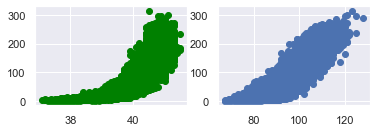

In [17]:
plt.subplot(2,2,1)
plt.scatter(calories_data['Body_Temp'],calories_data['Calories'],color='green')
plt.subplot(2,2,2)
plt.scatter(calories_data['Heart_Rate'],calories_data['Calories'])

It shows the Correlation Between all the features

<AxesSubplot:>

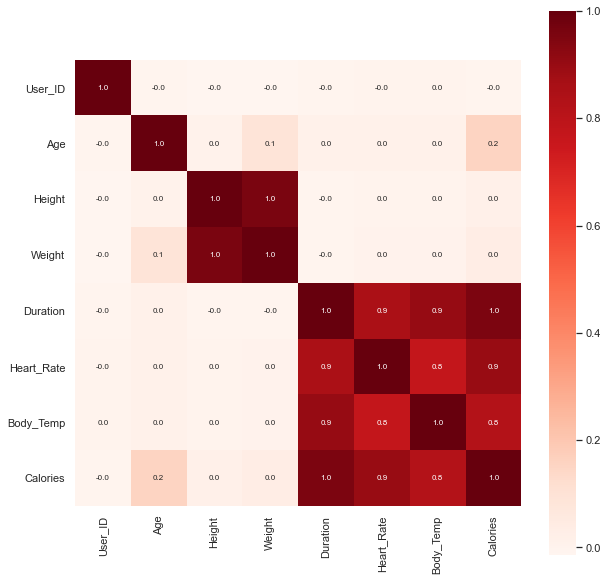

In [18]:
correlation=calories_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

In [19]:
calories_data.replace({"Gender":{'male':0,'female':1}},inplace=True)

In [20]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.000000,94,29,105.0,40.8,231.0
1,14861698,1,20,166.000000,60,14,94.0,40.3,66.0
2,11179863,0,69,174.465858,79,5,88.0,38.7,26.0
3,16180408,1,34,179.000000,71,13,100.0,40.5,71.0
4,17771927,1,27,154.000000,58,10,81.0,39.8,35.0


# Splitting Data

In [21]:
X=calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y=calories_data['Calories']

In [22]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.000000,94,29,105.0,40.8
1,1,20,166.000000,60,14,94.0,40.3
2,0,69,174.465858,79,5,88.0,38.7
3,1,34,179.000000,71,13,100.0,40.5
4,1,27,154.000000,58,10,81.0,39.8


In [23]:
Y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [25]:
print(X_train.shape,X_test.shape)

(12000, 7) (3000, 7)


In [26]:
X_test.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
7592,1,41,172.0,74,24,98.0,40.8
3551,0,70,189.0,96,24,113.0,40.9
9698,1,53,173.0,68,7,96.0,39.3
3759,0,36,191.0,96,2,82.0,38.4
2353,1,46,169.0,68,20,111.0,40.6


In [27]:
Y_test.head()

7592    127.0
3551    224.0
9698     38.0
3759      6.0
2353    137.0
Name: Calories, dtype: float64

# Building and Training Linear Regression Model 

In [28]:
from sklearn.linear_model import LinearRegression

In [30]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [31]:
test_data_prediction=model.predict(X_test)

In [32]:
print(test_data_prediction)

[137.51229713 182.17110249  50.1275515  ... 157.57092245  16.55171625
 100.21321579]


In [33]:
from sklearn import metrics 

In [34]:
mae=metrics.mean_absolute_error(Y_test,test_data_prediction)
print(mae)

8.385689953044363


In [35]:
r_score=metrics.r2_score(Y_test,test_data_prediction)
print(r_score)

0.9668771065291114


In [36]:
model.predict([[0,22,174,77,60,92.0,30.8]])

array([525.36077847])

# Building and Training Decesion Tree Regression Model

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
Dtreg=DecisionTreeRegressor(random_state=0)
Dtreg.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [39]:
test_data_prediction_Dtreg=Dtreg.predict(X_test)
print(test_data_prediction_Dtreg)

[129. 220.  34. ... 154.  25.  91.]


In [40]:
mae_Dtreg=metrics.mean_absolute_error(Y_test,test_data_prediction_Dtreg)
print(mae_Dtreg)

3.3413333333333335


In [41]:
r_score_Dtreg=metrics.r2_score(Y_test,test_data_prediction_Dtreg)
print(r_score_Dtreg)

0.9930482350990216


In [43]:
Dtreg.predict([[1,53,173.0,68,7,96.0,39.3]])

array([34.])

In [45]:
import pickle

In [47]:
filename='calories_burnt_prediction'
pickle.dump(Dtreg,open(filename,'wb'))